In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#load the dataset
df = pd.read_csv(r'F:\preprocessed_dataset_1.csv')

In [3]:
df.head()

,Unnamed: 0,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,amenities__Hot_Tub,amenities__Cat(s),amenities__Air_Conditioning,amenities__Indoor_Fireplace,amenities__Smoke_Detector,amenities__Wheelchair_Accessible,amenities__Family/Kid_Friendly,amenities__Fire_Extinguisher,amenities__Hangers,amenities__Smoking_Allowed
0,0,6,0,2,Real Bed,1.0,3,1,moderate,1,...,1,0,1,1,1,0,1,1,0,0
1,1,2,29,0,Futon,1.0,1,1,moderate,1,...,0,0,1,0,1,0,1,1,0,0
2,2,2,30,1,Real Bed,1.0,1,2,flexible,1,...,0,0,1,1,1,0,0,1,0,0
3,3,2,30,1,Real Bed,1.0,1,2,flexible,1,...,0,0,1,1,1,0,0,1,0,0
4,4,6,27,2,Real Bed,3.0,3,2,strict,1,...,0,0,1,1,1,0,1,1,0,0


In [6]:
sse = []
k_range = range(3, 20)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['latitude(North)', 'longitude(East)']])
    sse.append(km.inertia_)  #inertia will give the sse

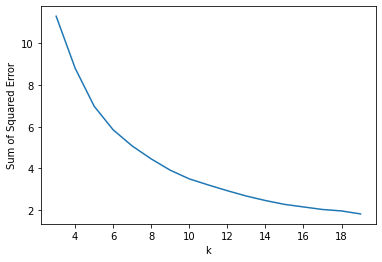

In [7]:
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)

In [9]:
#initialize the clusters
km = KMeans(10)

In [10]:
km

KMeans(n_clusters=10)

In [11]:
#fit and predict
y_pred = km.fit_predict(df[['latitude(North)', 'longitude(East)']])
y_pred

array([1, 1, 1, ..., 2, 6, 6])

In [16]:
df['Cluster_Lon_Lat'] = y_pred
df.head()

,Unnamed: 0,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,amenities__Air_Conditioning,amenities__Indoor_Fireplace,amenities__Smoke_Detector,amenities__Wheelchair_Accessible,amenities__Family/Kid_Friendly,amenities__Fire_Extinguisher,amenities__Hangers,amenities__Smoking_Allowed,Cluster,Cluster_Lon_Lat
0,0,6,0,2,Real Bed,1.0,3,1,moderate,1,...,1,1,1,0,1,1,0,0,1,1
1,1,2,29,0,Futon,1.0,1,1,moderate,1,...,1,0,1,0,1,1,0,0,1,1
2,2,2,30,1,Real Bed,1.0,1,2,flexible,1,...,1,1,1,0,0,1,0,0,1,1
3,3,2,30,1,Real Bed,1.0,1,2,flexible,1,...,1,1,1,0,0,1,0,0,1,1
4,4,6,27,2,Real Bed,3.0,3,2,strict,1,...,1,1,1,0,1,1,0,0,1,1


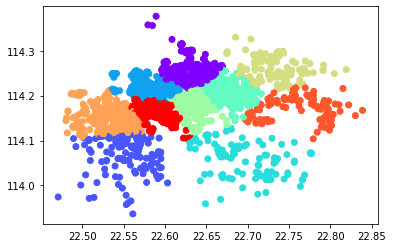

In [18]:
#plot the data
plt.scatter(df['latitude(North)'], df['longitude(East)'], c = df['Cluster_Lon_Lat'], cmap = 'rainbow')

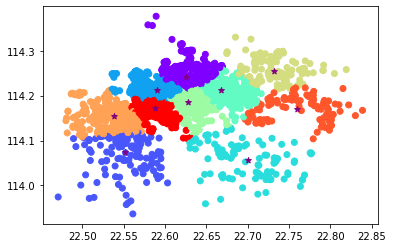

In [19]:
#plot the data
plt.scatter(df['latitude(North)'], df['longitude(East)'], c = df['Cluster_Lon_Lat'], cmap = 'rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color = 'purple', marker = '*')

In [20]:
df.to_csv(r'F:\preprocessed_dataset_1.csv')